<h1 align="center"><font face = "Times New Roman" size = "80">JPEG Compression</font></h1>
<h2 align="center"><font face = "Times New Roman" size = ""> Information theory and coding</font></h2>
<h3 align="center"><font face = "Times New Roman"> Fall 2019</font></h3>
<h6 align="center"><font face = "Times New Roman"">Alaa Mohamed Roshdy&nbsp 201600031</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Adham Mahrous&nbsp 201601078</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Mostafa Hamed&nbsp 201600236</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Kasem Saber&nbsp 201601144</font></h6>


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from PIL import Image
import encoder as e
import main as m

In [2]:
# Download desired image
!wget 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*'
! mv 'joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*' 'joker.jpg'

--2019-11-02 20:50:25--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809 (35K) [image/jpeg]
Saving to: ‘joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*’

joker-1568899702.jp 100%[===================>]  34.97K  --.-KB/s    in 0.003s  

2019-11-02 20:50:25 (10.0 MB/s) - ‘joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*’ saved [35809/35809]



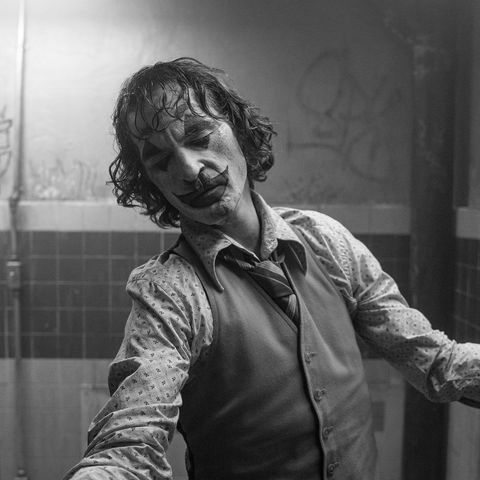

In [2]:
# Display the image
im = Image.open('joker.jpg')
im = im.convert("L")
im

In [3]:
def rmse(im, reconstructed_image):
  """
    Gets the RMSE of 2 images
    Args:
         im (numpy array) : The original image
         reconstructed_image (numpy ndarray): The reconstructed image
    Returns:
        rmse: root mean squared error as a metric to compare between the original image and the reconstructed
  """
  error = im - reconstructed_image
  mse = np.sum(np.square(error)) / (im.shape[0] * im.shape[1])
  rmse = np.square(mse)

  return rmse




---


<h2 align="center"><font face = "Times New Roman">JPEG compression</font></h3>


In [4]:
# Define block size
box_size = 8
encoded = [] # An array containing all 4 huffcodes resulting from the encoding process
reconstructed = [] # Array containing all 4 reconstructed images
execution_time = [] # Execution time for each compression

start = timeit.default_timer()
# Apply 8 x 8 compression using low compression quantization table

huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_8_low)
encoded.append(huffcoded)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_8_low))
execution_time.append(timeit.default_timer() - start)

print("Execution time: ", execution_time[0])

Execution time:  47.617525457999996


In [5]:
box_size = 8

start = timeit.default_timer()
# Apply 8 x 8 compression using high compression quantization table

huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_8_high)
encoded.append(huffcoded)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_8_high) )
execution_time.append(timeit.default_timer() - start)

print("Execution time: ", execution_time[1])

Execution time:  87.926642037


In [6]:
box_size = 16

start = timeit.default_timer()
# Apply 16 x 16 compression using low compression quantization table

huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_16_low)
encoded.append(huffcoded)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_16_low))
execution_time.append(timeit.default_timer() - start)

print("Execution time: ", execution_time[2])

Execution time:  58.085595162000004


In [7]:
box_size = 16

start = timeit.default_timer()
# Apply 16 x 16 compression using high compression quantization table

huffcoded, code_dict, n_rows, n_columns = m.encode(im, box_size, m.table_16_high)
encoded.append(huffcoded)
reconstructed.append( m.decode(huffcoded, code_dict,  n_rows, n_columns, box_size, m.table_16_high))
execution_time.append(timeit.default_timer() - start)

print("Execution time: ", execution_time[3])

Execution time:  34.570737492999996





---


<h2 align="center"><font face = "Times New Roman">Comparison</font></h2>
<h3 align="left"><font face = "Times New Roman">Qualitative comparison</font></h2>


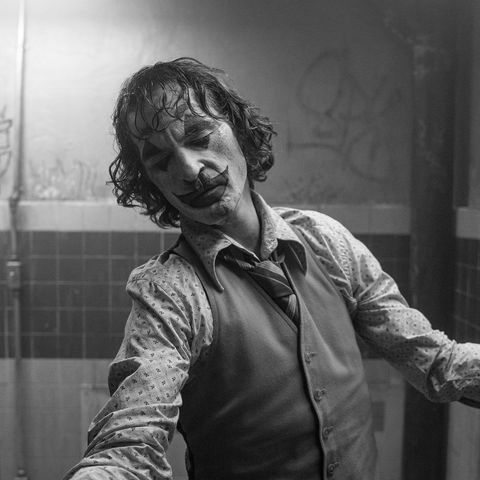

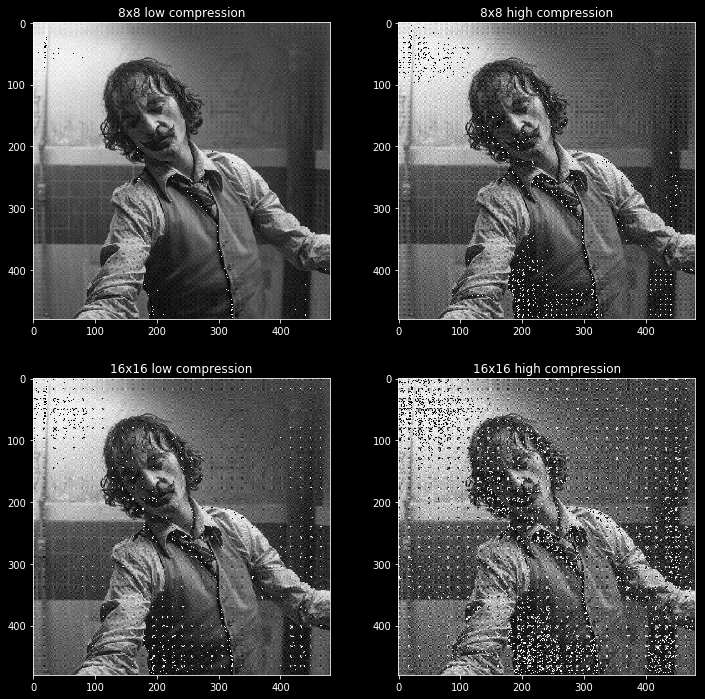

In [11]:
f, axarr = plt.subplots(2,2, figsize = (12,12))
axarr[0,0].imshow(reconstructed[0], cmap = "gray")
axarr[0,0].set_title("8x8 low compression")
axarr[0,1].imshow(reconstructed[1], cmap = "gray")
axarr[0,1].set_title("8x8 high compression")
axarr[1,0].imshow(reconstructed[2], cmap = "gray")
axarr[1,0].set_title("16x16 low compression")
axarr[1,1].imshow(reconstructed[3], cmap = "gray")
axarr[1,1].set_title("16x16 high compression")
im

<h3 align="left"><font face = "Times New Roman">Quantitative comparison</font></h2>

In [11]:
# Amount of compression achieved
imarr = e.reshape_image(im)

#Compute the number of bits of the np array image
size_before = imarr.size * imarr.itemsize * 8 
print("Size in bits of image before compression: ", size_before)

# Number of bits in encoded is the length of encoded. Each element in the string corresponds to a bit in reality.

size_after = []
for i in range(len(encoded)):
  size_after.append(len(encoded[i])) 
  

##################################################
# Number of floating point operations

#Dummy operation to measure the time for a single operation
start = timeit.default_timer()
x = 2837*3847
stop = timeit.default_timer()
single_FLOP = stop - start

##################################################


# Quality of compressed image (RMSE)

rms_error =[]
for i in range(len(reconstructed)):
  rms_error.append(rmse(imarr, reconstructed[i]))


# Print results
comp_type = ["8x8 low", "8x8 high", "16x16 low", "16x16 high",]
# intialise data of lists.
data = {'compression type':comp_type,
        'size in bits': size_after,
        'compression ratio':[size_before/x for x in size_after] ,
        "# of flops": [t/single_FLOP for t in execution_time],
        'RMSE': rms_error/max(rms_error)}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

Size in bits of image before compression:  1843200
  compression type  size in bits  compression ratio      RMSE
0          8x8 low        725738           2.539760  0.203164
1         8x8 high        633466           2.909706  0.534023
2        16x16 low        711227           2.591578  0.608930
3       16x16 high        610601           3.018665  1.000000






---


<h2 align="center"><font face = "Times New Roman"> Division of work amongst team members</font></h2>






TypeError: ignored